In [ ]:
from annotator import Annotator
from graph_density import Label_Metrics
import graphs as gr
import networkx as nx
import numpy as np
import pandas as pd

annotator1 = Annotator('annotator1', "annotations-TBikaun.json")
annotator2 = Annotator('annotator2', "annotations-ziyu.zhao.json")
annotator3 = Annotator('annotator3', "annotations-danielsantosa.json")
annotator4 = Annotator('annotator4', "annotations-mhodki.json")
annotator5 = Annotator('annotator5', "annotations-mstewartuwa.json")
annotator6 = Annotator('annotator6', "annotations-caitlinwoods.json")
annotator7 = Annotator('annotator7', "annotations-Tim.json")
label = Label_Metrics(annotator1, annotator2, annotator3)
overall_table = label.get_accumulated_table()

In [ ]:
def calculate_percentage_same_0_to_1(overall_table):
    percentage_data = {}
    for i in range(0, 101, 10):
        percentage_same = i / 100
        result_df = label.create_df_same_different(percentage_same, overall_table)
        # pd.set_option('display.max_rows', None)
        pivoted_table = label.pivot_dataframe(result_df)
        agreement_graph = Label_Metrics.create_agreement_graph(pivoted_table)
        # Calculate the graph density
        graph_density = Label_Metrics.custom_graph_density(agreement_graph)
        percentage_data[percentage_same*100] = graph_density
    return percentage_data

In [1]:
coefficients_0_to_1 = {0.0: 0.0053285968028419185,
 10.0: 0.12091254752851711,
 20.0: 0.2348993288590604,
 30.0: 0.3490427098674521,
 40.0: 0.42857142857142855,
 50.0: 0.5134529147982063,
 60.0: 0.5977443609022557,
 70.0: 0.700228832951945,
 80.0: 0.8021638330757341,
 90.0: 0.8884615384615384,
 100.0: 1.0}

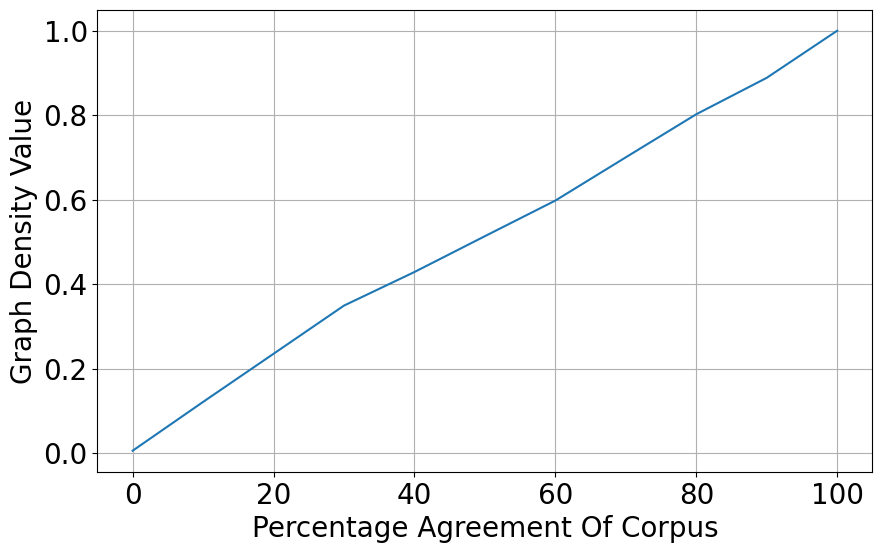

In [2]:
# coefficients_0_to_1 = calculate_percentage_same_0_to_1(overall_table)
import graphs as gr
gr.plot_density_agreement(coefficients_0_to_1, title='', x_axis_title='Percentage Agreement Of Corpus', y_axis_title='Graph Density Value')